# データ解析特論 2022年度水曜２限

# 第3回 その1 線形回帰再確認

## 線形回帰

変数 $x, y$ の間に線形関係 $y = b_0 + b_1 x + \varepsilon$ が成り立つと仮定して，サイズ $N$ のデータ配列 

$$
\begin{cases}
\boldsymbol X = (x_1, x_2, \ldots, x_N), \\
\boldsymbol y = (y_1, y_2, \ldots, y_N)
\end{cases}
$$ 

から線形関係をフィッティングするのに尤もらしい $b_0$, $b_1$ を求めよう．

求めたい線形関係はこれ↓

$$
y_i = b_0 + b_1 x_i + \varepsilon_i \quad (i=1, 2, \ldots, N)
$$

この $\boldsymbol \varepsilon = (\varepsilon_1, \varepsilon_2, \ldots, \varepsilon_N)$ はランダム項であり，$y_i = b_0 + b_1 x_i$ と表しきれない部分~~(を全てこれに押しこめて都合良く表示するため)~~の項である．

### 注意1  
線形回帰をするにあたっては，$y_i$ は何かしらの線形モデル $y_i = b_0 + b_1 x_i + e_i$ で与えられたデータである**<font color="#DC143C">必要はない</font>**．そもそも線形モデルで生成されたデータかどうかは検証できないし，線形モデルで生成されたデータにお目にかかることはまずない．

線形モデルで生成されていないからといって，線形回帰してはいけないわけではない．線形フィッティングをすることで，増減の傾向を掴みやすくなることだってある．複雑で結果の解釈に困るモデルよりは実社会での利用価値はあるかもしれない．

### 注意2  
しばしば「$e_i$ は正規分布に従う」という条件は回帰分析を行う上での"仮定"と言われる．しかし最小二乗法で線形回帰する上では，別にそれが正規分布に従うことは**<font color="#DC143C">必要ではない</font>**．これについては後で確認する．

<font size="7">もう一度注意するが，</font>

<font size="7">線形モデルで生成されているデータのパラメータを推定するのと</font>

<font size="7">線形モデルをデータに当てはめてパラメータをフィッティングするのは</font>

<font size="7">問題の意味合いが違う</font>

## 線形フィッティング

回帰モデルを

$$
\hat y_i = \hat f_{b_0, b_1}(x) = b_0 + b_1 x
$$

と置く．回帰モデルによるデータ $x_i$ の推定値を $\hat y_i$ とか $\hat f_{b_0, b_1}(x_i)$ のように， $\hat{}$ をつけて表すことにする．

回帰モデルはそのパラメータによって変わる．$\hat f_{b_0, b_1}(x_i)$ と表すのは，その依存性を明示する意味もある．

## 最小二乗法

### MSE

回帰モデルのパラメータをデータから求める手法の１つに**<font color="#DC143C">最小二乗法</font>**がある．これは，観測値 $y_i$ に対する予測値 $\hat y_i$ の平均二乗誤差

$$
\mathrm{MSE} = \frac1N \sum_{i=1}^N (\hat y_i - y_i)^2 
$$

を最小にする $b_0, b_1$ を求める手法である．

MSE は **<font color="#DC143C">M</font>**ean **<font color="#DC143C">S</font>**quared **<font color="#DC143C">E</font>**rror のこと．つまり，Error（誤差）$\hat y_i - y_i$ の Squared (平方つまり二乗) の Mean (平均) を計算している．

MSE の測り方は，線形モデルからの残差をデータ平均的に小さくするパラメータを求める手法．

その他にも

- 平均絶対誤差 (Mean Absolute Error): $\displaystyle \mathrm{MAE} = \frac1N \sum_{i=1}^N |\hat y_i - y_i|$
- 最大誤差 (Maximum Error): $\displaystyle \mathrm{ME} = \max_{i=1,2, \ldots, N} |\hat y_i - y_i|$

がある．また，平均の代わりに中央値を使ったりとさまざま．

### 線形モデルの場合

線形モデルの場合の MSE は，$\hat y_i$ に $b_0 + b_1 x_i$ を代入した

$$
\mathrm{MSE} = \frac1N \sum_{i=1}^N (\hat y_i - y_i)^2
= \frac1N \sum_{i=1}^N (b_0 + b_1 x_i - y_i)^2
$$

で表される．$b_0, b_1$ が変わるごとに線形フィッティングの当てはまりの度合いは変わり，同時に MSE の値も変わる．つまり MSE は $b_0, b_1$ の関数とみなせる．これを $E(b_0, b_1)$ とおこう．

$$
E(b_0, b_1) = \frac1N \sum_{i=1}^N (b_0 + b_1 x_i - y_i)^2
$$

### MSE の停留点

$E(b_0, b_1)$ の最小値を与える最小点 $\hat b_0, \hat b_1$ を求めるには2変数関数の極値問題を解けば良い．つまり $E(b_0, b_1)$ の勾配ベクトル 

$$
\nabla E(b_0, b_1) = \left( \frac{\partial E}{\partial b_0}(b_0, b_1), \frac{\partial E}{\partial b_1}(b_0, b_1) \right)
$$

が零ベクトル $(0, 0)$ となる点（$E$ の停留点）を求めれば良い．

**補足**  
この場合 $E(b_0, b_1)$ は $(b_0, b_1)$ に対して凸関数であり，停留点はただ１つであり，さらにそれは $E(b_0, b_1)$ の最小値を与えることが知られている．

### まず $E(b_0, b_1)$ を $b_0$ で偏微分
$$
\begin{align}
&
\frac{\partial E}{\partial b_0}(b_0, b_1) 
= \frac{\partial E}{\partial b_0} \left( \frac1N \sum_{i=1}^N (b_0 + b_1 x_i - y_i)^2 \right)
= \frac1N \sum_{i=1}^N \frac{\partial E}{\partial b_0} \left\{ (b_0 + b_1 x_i - y_i)^2 \right\}
\\
&
\phantom{\frac{\partial E}{\partial b_0}(b_0, b_1)}
= \frac1N \sum_{i=1}^N 2 (b_0 + b_1 x_i - y_i) \cdot \frac{\partial E}{\partial b_0} (b_0 + b_1 x_i - y_i)
\\
&
\phantom{\frac{\partial E}{\partial b_0}(b_0, b_1)}
= \frac1N \sum_{i=1}^N 2 (b_0 + b_1 x_i - y_i) \cdot 1
= \frac2N \sum_{i=1}^N (b_0 + b_1 x_i - y_i)
\\
&
\phantom{\frac{\partial E}{\partial b_0}(b_0, b_1)}
= 2 \left( \frac1N \sum_{i=1}^N b_0 + b_1 \cdot \frac1N \sum_{i=1}^N x_i - \frac1N \sum_{i=1}^N y_i \right)
\\
&
\phantom{\frac{\partial E}{\partial b_0}(b_0, b_1)}
= 2 \left( b_0 + b_1 \langle x \rangle - \langle y \rangle \right)
\end{align}
$$

ただし，$\langle x \rangle = \frac1N \sum_{i=1}^N x_i$ は $x_i$ の標本平均である．$\langle y \rangle$ も同様． 

したがって偏微分係数が 0 となる $(b_0, b_1)$ は
$$
\begin{align}
&
\frac{\partial E}{\partial b_0}(b_0, b_1) = 0
\ \Longleftrightarrow \ 
b_0 + b_1 \langle x \rangle - \langle y \rangle = 0
\\
&
\phantom{\frac{\partial E}{\partial b_0}(b_0, b_1) = 0}
\ \Longleftrightarrow \ 
b_0 + b_1 \langle x \rangle = \langle y \rangle
\end{align}
$$
という式を満たす．

### 次に $E(b_0, b_1)$ を $b_1$ で偏微分
$$
\begin{align}
&
\frac{\partial E}{\partial b_1}(b_0, b_1) 
= \frac{\partial E}{\partial b_1} \left( \frac1N \sum_{i=1}^N (b_0 + b_1 x_i - y_i)^2 \right)
= \frac1N \sum_{i=1}^N \frac{\partial E}{\partial b_1} \left\{ (b_0 + b_1 x_i - y_i)^2 \right\}
\\
&
\phantom{\frac{\partial E}{\partial b_1}(b_0, b_1)}
= \frac1N \sum_{i=1}^N 2 (b_0 + b_1 x_i - y_i) \cdot \frac{\partial E}{\partial b_1} (b_0 + b_1 x_i - y_i)
\\
&
\phantom{\frac{\partial E}{\partial b_1}(b_0, b_1)}
= \frac1N \sum_{i=1}^N 2 (b_0 + b_1 x_i - y_i) \cdot x_i
= \frac2N \sum_{i=1}^N (b_0 x_i + b_1 x_i^2 - x_i y_i)
\\
&
\phantom{\frac{\partial E}{\partial b_0}(b_0, b_1)}
= 2 \left( b_0 \cdot \frac1N \sum_{i=1}^N x_i + b_1 \cdot \frac1N \sum_{i=1}^N x_i^2 - \frac1N \sum_{i=1}^N x_i y_i \right)
\\
&
\phantom{\frac{\partial E}{\partial b_0}(b_0, b_1)}
= 2 \left( b_0 \langle x \rangle + b_1 \langle x^2 \rangle - \langle xy \rangle \right)
\end{align}
$$

ただし，$\langle x^2 \rangle = \frac1N \sum_{i=1}^N x_i^2$, $\langle xy \rangle = \frac1N \sum_{i=1}^N x_i y_i$ である．

前と同様に，偏微分係数が 0 となる $(b_0, b_1)$ は

$$
\begin{align}
&
\frac{\partial E}{\partial b_1}(b_0, b_1) = 0
\ \Longleftrightarrow \ 
b_0 \langle x \rangle + b_1 \langle x^2 \rangle - \langle xy \rangle = 0
\\
&
\phantom{\frac{\partial E}{\partial b_1}(b_0, b_1) = 0}
\ \Longleftrightarrow \ 
b_0 \langle x \rangle + b_1 \langle x^2 \rangle = \langle xy \rangle
\end{align}
$$

という式を満たす．

### MSE を最小にする $(b_0, b_1)$ が満たす連立一次方程式
2つの式をまとめると，

$$
\begin{cases}
b_0 + b_1 \langle x \rangle & = \langle y \rangle \\
b_0 \langle x \rangle + b_1 \langle x^2 \rangle & = \langle xy \rangle
\end{cases}
\quad ...(*)
$$

である．

この2式を満たす $b_0, b_1$ を $\hat b_0, \hat b_1$ とおく．データから推定されるパラメータなので $\hat{}$ を付けて表す．

$$
\begin{cases}
b_0 + b_1 \langle x \rangle & = \langle y \rangle \\
b_0 \langle x \rangle + b_1 \langle x^2 \rangle & = \langle xy \rangle
\end{cases}
$$

の左辺は $b_0$, $b_1$ の1次式になっている．行列とベクトルを用いて表すと

$$
\begin{pmatrix} b_0 & b_1 \end{pmatrix}
\begin{pmatrix}
1                 & \langle x \rangle \\
\langle x \rangle & \langle x^2 \rangle 
\end{pmatrix}
=
\begin{pmatrix} \langle y \rangle & \langle xy \rangle \end{pmatrix}
\quad ...(**)
$$

という連立一次方程式を得る．

$\boldsymbol b = \begin{pmatrix} b_0 & b_1 \end{pmatrix}$, $\boldsymbol{\mathcal X} = \begin{pmatrix}
1                 & \langle x \rangle \\
\langle x \rangle & \langle x^2 \rangle 
\end{pmatrix}$, $\boldsymbol c = \begin{pmatrix} \langle y \rangle & \langle xy \rangle \end{pmatrix} $
とおくと，この連立一次方程式は

$$
\boldsymbol b \boldsymbol{\mathcal X} = \boldsymbol c
$$

となる．$(\mbox{横ベクトル}) (\mbox{行列}) = (\mbox{横ベクトル})$ の形で表されていることに注意しよう．

### 余談

よく見知った連立一次方程式の形で表したいのなら，$(*)$ を表す連立一次方程式を

$$
\begin{pmatrix}
1                 & \langle x \rangle \\
\langle x \rangle & \langle x^2 \rangle 
\end{pmatrix}
\begin{pmatrix} b_0 \\ b_1 \end{pmatrix}
=
\begin{pmatrix} \langle y \rangle \\ \langle xy \rangle \end{pmatrix}
$$

とすれば良い．このときは

$$
\boldsymbol{\mathcal X} \boldsymbol b^{\mathrm T} = \boldsymbol c^{\mathrm T}
$$

となり，$(\mbox{行列})(\mbox{縦ベクトル})  = (\mbox{縦ベクトル})$ の形で表される．

### 連立一次方程式を解く

もし係数行列 $\begin{pmatrix}
1                 & \langle x \rangle \\
\langle x \rangle & \langle x^2 \rangle 
\end{pmatrix}
$
が正則ならば，その逆行列を $(**)$ の右から掛けることで

$$
\hat{\boldsymbol b} = \boldsymbol c \boldsymbol{\mathcal X}^{-1}
$$

と連立一次方程式の解 $\hat{\boldsymbol b} = (\hat b_0, \hat b_1)$ を求められる．この2式を満たす $b_0, b_1$ を $\hat b_0, \hat b_1$ とおく．データから推定されるパラメータなので $\hat{}$ を付けて表す．

尚，係数行列の正則性はその行列式が 0 でなければ保証される．つまり，

$$
\begin{vmatrix}
1                 & \langle x \rangle \\
\langle x \rangle & \langle x^2 \rangle 
\end{vmatrix}
= \langle x^2 \rangle - \langle x \rangle^2 > 0
$$

であれば良い．これは $x$ の標本分散 $\sigma_x^2 = \langle x^2 \rangle - \langle x \rangle^2$ が正ということを意味している．$x_i$ が全て同じ値のときのみ $\sigma_x^2 = 0$ となるので，$x_i$ に異なる点が含まれていさえすれば良い．

観測データの $x_i$ が全て同じ値となっていたら，$y$ を $x$ で回帰させるという考えは不適切である．そのため，以下では $x$ の分散は正である場合に限定する．

### 成分ごとに計算

$\hat{\boldsymbol b} = \boldsymbol c \boldsymbol{\mathcal X}^{-1}$ を成分ごとに計算すると，

$$
\begin{align}
&
\begin{pmatrix} \hat b_0 & \hat b_1 \end{pmatrix}
= 
\begin{pmatrix} \langle y \rangle & \langle xy \rangle \end{pmatrix}
\begin{pmatrix}
1                 & \langle x \rangle \\
\langle x \rangle & \langle x^2 \rangle 
\end{pmatrix}^{-1}
\\
&
\phantom{\begin{pmatrix} \hat b_0 & \hat b_1 \end{pmatrix}}
= 
\frac1{\langle x^2 \rangle - \langle x \rangle^2}
\begin{pmatrix} \langle y \rangle & \langle xy \rangle \end{pmatrix}
\begin{pmatrix}
\langle x^2 \rangle & -\langle x \rangle \\
-\langle x \rangle  & 1
\end{pmatrix}
\\
&
\phantom{\begin{pmatrix} \hat b_0 & \hat b_1 \end{pmatrix}}
= \frac1{\langle x^2 \rangle - \langle x \rangle^2}
\begin{pmatrix} \langle x^2 \rangle \langle y \rangle - \langle x \rangle \langle xy \rangle &
\langle xy \rangle - \langle x \rangle \langle y \rangle \end{pmatrix}
\end{align}
$$
となる．

### $\hat b_1$ について

$$
\hat b_1 
= \frac{\langle xy \rangle - \langle x \rangle \langle y \rangle}{\langle x^2 \rangle - \langle x \rangle^2}
= \frac{\sigma_{xy}}{\sigma_x^2}
$$

で与えられ，

- 分子：$x$ と $y$ の標本共分散 $\sigma_{xy}$
- 分母：$x$ の標本分散 $\sigma_x^2$

となっていることがわかる．

$\hat b_1$ が得られれば，$\hat b_0$ は $(*)$ の1式目

$$
\hat b_0 = \langle y \rangle - \hat b_1 \langle x \rangle
$$

から計算すれば良い．

## 回帰残差

### 回帰式と推定値

上では，データから最小二乗法によって

$$
\hat y_i = \hat b_0 + \hat b_1 x_i
$$

という線形モデルを立てたのであった．これを**回帰式**と呼ぶ．

回帰式による推定値 $\hat y_i$ の標本平均は

$$
\begin{align}
&
\langle \hat y \rangle 
= \frac1N \sum_{i=1}^N \hat y_i 
= \frac1N \sum_{i=1}^N (\hat b_0 + \hat b_1 x_i)
= \hat b_0 + \hat b_1 \frac1N \sum_{i=1}^N x_i 
= \hat b_0 + \hat b_1 \langle x \rangle 
\\
&
\phantom{\langle \hat y \rangle }
= \langle y \rangle 
\end{align}
$$

なので，$y_i$ の標本平均に等しい．

### 回帰残差

観測値と回帰式による推定値 $\hat y_i$ との差

$$
e_i = y_i - \hat y_i
$$

を**回帰残差**と呼ぶ．これはつまり

$$
e_i = y_i - (\hat b_0 + \hat b_1 x_i)
$$

のこと．

### 回帰残差の標本平均

回帰残差の標本平均を取ると，

$$
\begin{align}
&
\langle e \rangle 
= \frac1N \sum_{i=1}^N e_i 
= \frac1N \sum_{i=1}^N (y_i - \hat b_0 - \hat b_1 x_i)
= \frac1N \sum_{i=1}^N y_i - \hat b_0 - \hat b_1 \frac1N \sum_{i=1}^N x_i
\\
&
\phantom{\langle e \rangle = \frac1N \sum_{i=1}^N e_i}
= \langle y \rangle - \hat b_0 - \hat b_1 \langle x \rangle
\end{align}
$$

となる．一方，$\hat b_0$ は

$$
\hat b_0 = \langle y \rangle - \hat b_1 \langle x \rangle
$$

で定めたパラメータなので，

$$\langle e \rangle = 0$$ 

ということがわかる．

### 回帰残差と $x_i$ は無相関

$x_i$ と回帰残差 $e_i$ との標本共分散 $\sigma_{xe}$ を計算しよう．$\langle e \rangle = 0$ と $e_i = y_i - (\hat b_0 + \hat b_1 x_i)$ を用いると，

$$
\begin{align}
&
\sigma_{xe}
= \langle xe \rangle - \langle x \rangle \langle e \rangle 
= \langle xe \rangle
= \frac1N \sum_{i=1}^N x_i e_i
\\
&
\phantom{\sigma_{xe}}
= \frac1N \sum_{i=1}^N x_i (y_i - \hat b_0 - \hat b_1 x_i)
\\
&
\phantom{\sigma_{xe}}
= \frac1N \sum_{i=1}^N x_i y_i - \hat b_0 \cdot \frac1N \sum_{i=1}^N x_i - \hat b_1 \cdot \frac1N \sum_{i=1}^N x_i^2
\\
&
\phantom{\sigma_{xe}}
= \langle xy \rangle - \hat b_0 \langle x \rangle- \hat b_1 \langle x^2 \rangle
\end{align}
$$

連立一次方程式 $(*)$ の2式目から，$\langle xy \rangle - \hat b_0 \langle x \rangle- \hat b_1 \langle x^2 \rangle = 0$ なので，回帰残差 $e_i$ と $x_i$ の標本共分散は

$$
\sigma_{xe} = \langle xe \rangle - \langle x \rangle \langle e \rangle = 0
$$

が成り立つ．すなわち無相関である．

### 回帰残差と推定値 $\hat y_i$ は無相関

回帰による推定値 $\hat y_i$ と回帰残差 $e_i$ との標本共分散 $\sigma_{\hat y e}$ を計算しよう．$\langle e \rangle = 0$ と $\langle xe \rangle = 0$ を用いると，

$$
\begin{align}
&
\sigma_{\hat y e}
= \langle \hat ye \rangle - \langle \hat y \rangle \langle e \rangle 
= \langle \hat ye \rangle
= \frac1N \sum_{i=1}^N \hat y_i e_i
\\
&
\phantom{\sigma_{\hat y e}}
= \frac1N \sum_{i=1}^N (\hat b_0 + \hat b_1 x_i) e_i
= b_0 \frac1N \sum_{i=1}^N e_i + \hat b_1 \cdot \frac1N \sum_{i=1}^N x_i e_i
\\
&
\phantom{\sigma_{\hat y e}}
= b_0 \langle e \rangle - \hat b_1 \langle xe \rangle
= 0 - 0 = 0
\end{align}
$$

回帰による推定値 $\hat y_i$ と回帰残差 $e_i$ との標本共分散 $\sigma_{\hat y e}$ は 0，すなわち無相関である．

## 注意

ちなみにこれらの性質は，

- **データが線形モデルに生成されたものでなくても構わないし，**
- **ランダム項がどんな分布であっても構わない．**

その意味で最小二乗法による線形フィッティングはとても使い勝手の良い手法．

以下で数値的に検証してみよう．

## 数値検証

### import

In [1]:
# import
import numpy as np
import matplotlib.pyplot as plt


### まずは線形モデルでデータを生成

[-5.00000000e-01 -4.00000000e-01 -3.00000000e-01 -2.00000000e-01
 -1.00000000e-01 -1.11022302e-16  1.00000000e-01  2.00000000e-01
  3.00000000e-01  4.00000000e-01  5.00000000e-01  6.00000000e-01
  7.00000000e-01  8.00000000e-01  9.00000000e-01  1.00000000e+00]
<e> = -2.0816681711721685e-17
<e> = -2.08e-17
<e> = -0.000000000000000021
<xe> = -3.75e-17
<yhat e> = -5.00e-17


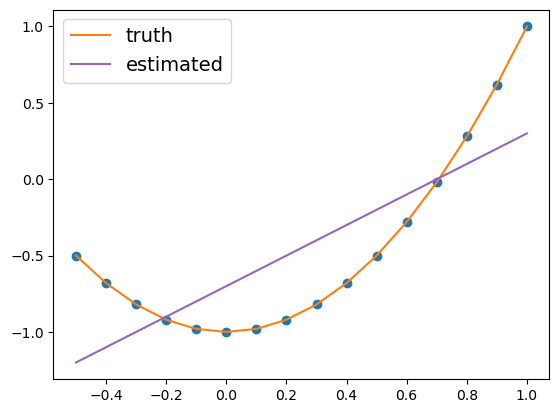

In [32]:
np.random.seed(seed=777)

# 説明変数の配列 X
X = np.arange(-0.5, 1.1, 0.1)
print(X)
# randomness の配列 W
#W = np.random.normal(loc=0.0, scale=1.0, size=X.size)
W = np.random.normal(loc=0.0, scale=X**2, size=X.size)
#W = np.random.chisquare(df=7, size=X.size) - 7
#plt.hist(W, bins=100)

# 線形モデル Y = B0 + B1*X + W
# 真のパラメータ
B0, B1 = -1.0, 2.0
#Y = B0 + B1*X + W
Y = B0 + B1*X**2 #+ W

# X と Y の散布図
plt.scatter(X, Y)
# 真の線形モデルの直線
#plt.plot([-0.5, 1.0], [B0+B1*-0.5, B0+B1*1.0], c='tab:orange', label='truth')
plt.plot(X, B0 + B1*X**2, c='tab:orange', label='truth')

# パラメータ推定値: b0, b1
b1 = np.cov(X, Y, ddof=0)[0, 1] / np.var(X, ddof=0)
# np.var(X, ddof=0) == np.mean((X-np.mean(X))**2)


b0 = np.mean(Y) - b1*np.mean(X)

# 回帰モデルによる推定値: Yhat
Yhat = b0 + b1*X
# 線形回帰による回帰直線
plt.plot([-0.5, 1.0], [b0+b1*-0.5, b0+b1*1.0], c='tab:purple', label='estimated')
plt.legend(fontsize=14)

# 回帰残差: E
E = Y - Yhat

# E の統計値の確認: <e>, <xe>
print(f'<e> = {np.mean(E)}')
print('<e> = %.2e'%np.mean(E))
print('<e> = %.18f'%np.mean(E))

print('<xe> = %.2e'%np.cov(X, E, ddof=0)[0, 1])
print('<yhat e> = %.2e'%np.cov(Yhat, E, ddof=0)[0, 1])


In [15]:
np.cov(X, Y, ddof=0), np.var(X, ddof=0), np.var(Y, ddof=0)

(array([[0.2125    , 0.39940874],
        [0.39940874, 1.75247906]]),
 0.21249999999999988,
 1.752479064801164)

### 線形でないモデルで生成されたデータ

In [ ]:
# 説明変数の配列 X


# 目的変数の配列 Y 


# X と Y の散布図


# 線形フィッティングによるパラメータ: b0, b1



# 回帰モデルによる推定値: Yhat


# 回帰残差: E


# E の統計値の確認: <e>, <xe>


# 線形回帰による回帰直線



# 演習問題 3-1

自分で適当にデータを生成し，線形回帰フィッティングを行ない，データの散布図と合わせて真のモデルの表す関数関係の曲線（直線）と回帰直線を描け．また，上で確かめたような回帰残差の性質が，線形モデル＋正規分布でなくとも成り立つことを確かめよ．

演習問題は新規に notebook を立ち上げ，

- 演習問題の番号
- 氏名
- 学生番号
- 回答内容

をセルにきちんと記載すること．

回答内容は，code セルで計算し，図示するだけではなく，適宜 markdown セルで説明の記述を必ず行うこと．

<h3><div style="text-align: right;">その2につづく</div></h3>